In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

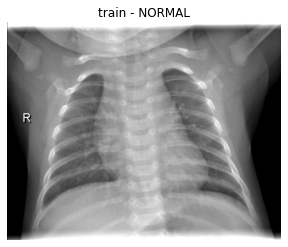

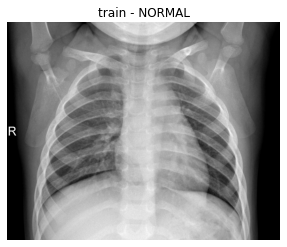

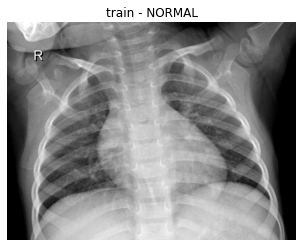

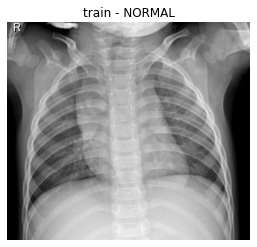

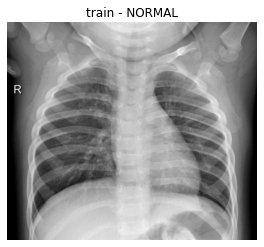

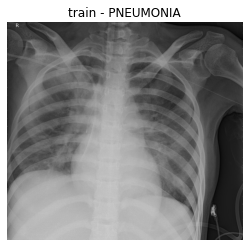

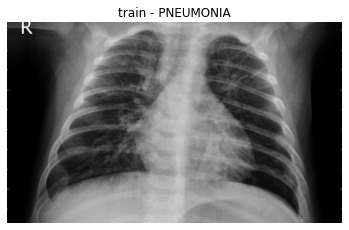

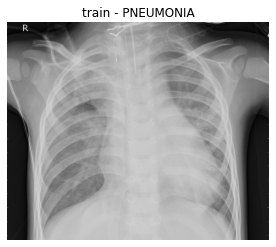

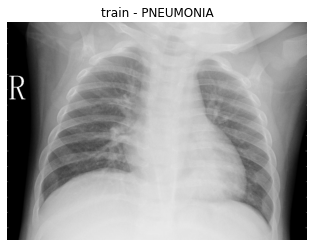

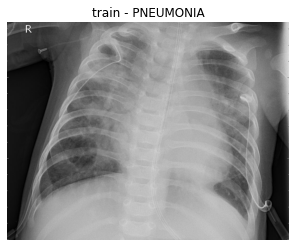

In [2]:
data_dir = 'chest_xray'
categories = ['NORMAL', 'PNEUMONIA']

# Visualize some images
def show_random_images(dataset_type='train', n=5):
    folder = os.path.join(data_dir, dataset_type)
    for category in categories:
        path = os.path.join(folder, category)
        images = os.listdir(path)
        for i in range(n):
            img_path = os.path.join(path, random.choice(images))
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            plt.title(f"{dataset_type} - {category}")
            plt.axis('off')
            plt.show()

show_random_images()


In [3]:
IMG_SIZE = 150

def preprocess_data(dataset_type='train'):
    data = []
    folder = os.path.join(data_dir, dataset_type)
    for category in categories:
        class_num = categories.index(category)
        path = os.path.join(folder, category)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                data.append([resized, class_num])
    random.shuffle(data)
    X = np.array([i[0] for i in data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y = np.array([i[1] for i in data])
    return X/255.0, y


In [ ]:
X_train, y_train = preprocess_data('train')
X_val, y_val = preprocess_data('val')
X_test, y_test = preprocess_data('test')


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\waquar ahmed\Downloads\Programs\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,827,905 (18.42 MB)

 Trainable params: 4,827,905 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    batch_size=32
)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 412ms/step - accuracy: 0.7793 - loss: 0.5019 - val_accuracy: 0.6250 - val_loss: 0.9138
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 398ms/step - accuracy: 0.9398 - loss: 0.1523 - val_accuracy: 0.6875 - val_loss: 0.7434
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 396ms/step - accuracy: 0.9560 - loss: 0.1114 - val_accuracy: 0.7500 - val_loss: 0.5041
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 394ms/step - accuracy: 0.9690 - loss: 0.0909 - val_accuracy: 0.9375 - val_loss: 0.3476
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 419ms/step - accuracy: 0.9691 - loss: 0.0797 - val_accuracy: 0.6875 - val_loss: 0.7473
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 401ms/step - accuracy: 0.9737 - loss: 0.0655 - val_accuracy: 0.9375 - val_loss: 0.2384
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 66s 404ms/step - accuracy: 0.9714 - loss: 0.0809 - val_accuracy: 0.6875 - val_loss: 0.6719
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 393ms/step - accuracy: 0.9794 - loss: 0

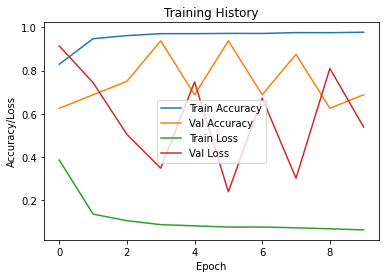

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.title('Training History')
plt.show()


In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.7425 - loss: 1.0990
Test Accuracy: 0.7372, Test Loss: 1.1610


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


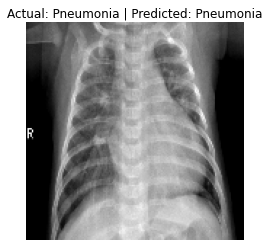

In [10]:
import random

def predict_random():
    idx = random.randint(0, len(X_test)-1)
    img = X_test[idx]
    label = y_test[idx]
    prediction = model.predict(img.reshape(1, 150, 150, 1))[0][0]
    
    plt.imshow(img.reshape(150,150), cmap='gray')
    plt.title(f"Actual: {'Pneumonia' if label == 1 else 'Normal'} | Predicted: {'Pneumonia' if prediction > 0.5 else 'Normal'}")
    plt.axis('off')
    plt.show()

predict_random()


In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predicted labels
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

# Classification report
print(classification_report(y_test, y_pred_labels, target_names=['Normal', 'Pneumonia']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step
              precision    recall  f1-score   support

      Normal       0.99      0.30      0.46       234
   Pneumonia       0.70      1.00      0.83       390

    accuracy                           0.74       624
   macro avg       0.85      0.65      0.64       624
weighted avg       0.81      0.74      0.69       624



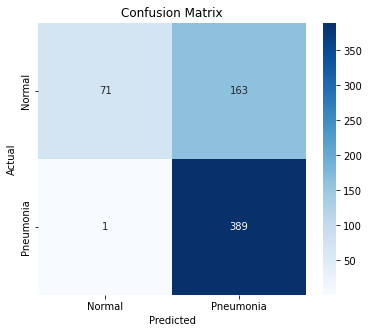

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:
model.save("pneumonia_cnn_model.h5")


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# Re-train with augmentation
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          epochs=10,
          validation_data=(X_val, y_val))


c:\Users\waquar ahmed\Downloads\Programs\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 87s 524ms/step - accuracy: 0.8464 - loss: 0.4016 - val_accuracy: 0.9375 - val_loss: 0.2774
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 558ms/step - accuracy: 0.8860 - loss: 0.2735 - val_accuracy: 0.9375 - val_loss: 0.2477
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 581ms/step - accuracy: 0.9199 - loss: 0.1998 - val_accuracy: 0.8750 - val_loss: 0.3813
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 625ms/step - accuracy: 0.9232 - loss: 0.1866 - val_accuracy: 0.9375 - val_loss: 0.3196
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 541ms/step - accuracy: 0.9287 - loss: 0.1808 - val_accuracy: 0.6875 - val_loss: 0.4565
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 520ms/step - accuracy: 0.9269 - loss: 0.1790 - val_accuracy: 0.8750 - val_loss: 0.3458
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 520ms/step - accuracy: 0.9365 - loss: 0.1675 - val_accuracy: 0.6875 - val_loss: 0.4176
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 89s 546ms/step - accuracy: 0.9420 - loss: 

In [15]:
test_loss_aug, test_acc_aug = model.evaluate(X_test, y_test)
print(f"Test Accuracy After Augmentation: {test_acc_aug:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.9004 - loss: 0.2974
Test Accuracy After Augmentation: 0.8894


In [18]:
model.save("pneumonia_augmented_model.h5")


In [19]:
y_pred_aug = model.predict(X_test)
y_pred_labels_aug = (y_pred_aug > 0.5).astype(int).flatten()


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step


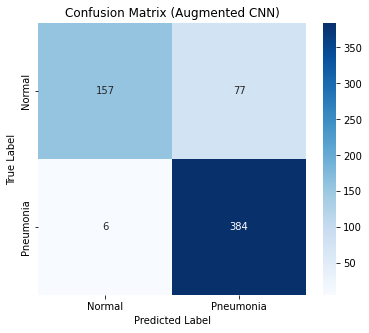

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm_aug = confusion_matrix(y_test, y_pred_labels_aug)

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm_aug, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Pneumonia'],
            yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Augmented CNN)')
plt.show()


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels_aug, target_names=['Normal', 'Pneumonia']))


              precision    recall  f1-score   support

      Normal       0.96      0.67      0.79       234
   Pneumonia       0.83      0.98      0.90       390

    accuracy                           0.87       624
   macro avg       0.90      0.83      0.85       624
weighted avg       0.88      0.87      0.86       624

